## PART A – Time Series Analysis

A monthly time series a monthly time series of average temperatures in Armagh from January 1844 to December 2004. Estimation and discussion of time series models from
each of the categories are as follows:

1.  Exponential Smoothing / ETS models
2.  ARIMA/SARIMA models
3.  Simple time series models

#### Importing Libraries and Reading the dataset

In [1]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
colname=['x']

In [2]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 572.7/572.7 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from statsmodels.graphics.tsaplots import month_plot
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA


In [4]:
#read the dataset
dataset = pd.read_csv("nitm18442004.csv", names=colname, header=None)
dataset.head()

,x
0,x
1,4.5
2,2.4
3,4.8
4,9.1


In [5]:
#shape of dataset
dataset.shape

(1933, 1)

In [6]:
#last 5 columns
dataset.tail()

,x
1928,15.4
1929,13.2
1930,8.6
1931,8.2
1932,6.2


In [7]:
#Data refers from Jan 1844 to December 2004.  It represents a monthly time series of average temperatures in Armagh. Creating monthly dates for timestamp from Jan 1844 to Dec 2004.
month = pd.date_range(start='1/1/2003', end='1/1/2004', freq='M')
month

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

In [8]:
import pandas as pd

#creating new column
dataset['x'] = pd.DataFrame({'Month': month})

dataset.head()

,x
0,2003-01-31
1,2003-02-28
2,2003-03-31
3,2003-04-30
4,2003-05-31


### statistical description

In [9]:
#dataset description
dataset.describe()

,x
count,12
unique,12
top,2003-01-31 00:00:00
freq,1
first,2003-01-31 00:00:00
last,2003-12-31 00:00:00


### Checking for the null values present in the dataset

In [11]:
dataset.isnull().sum()

x    1921
dtype: int64

### Exploratory Data Analysis

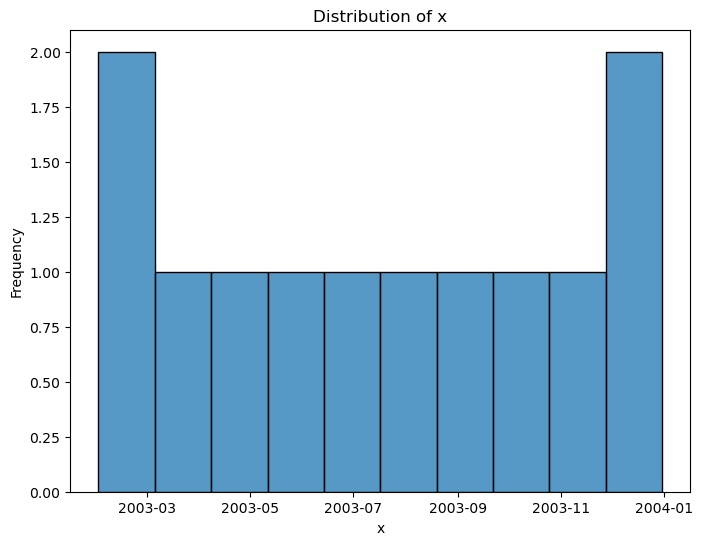

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='x', bins=10)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Distribution of x')
plt.show()

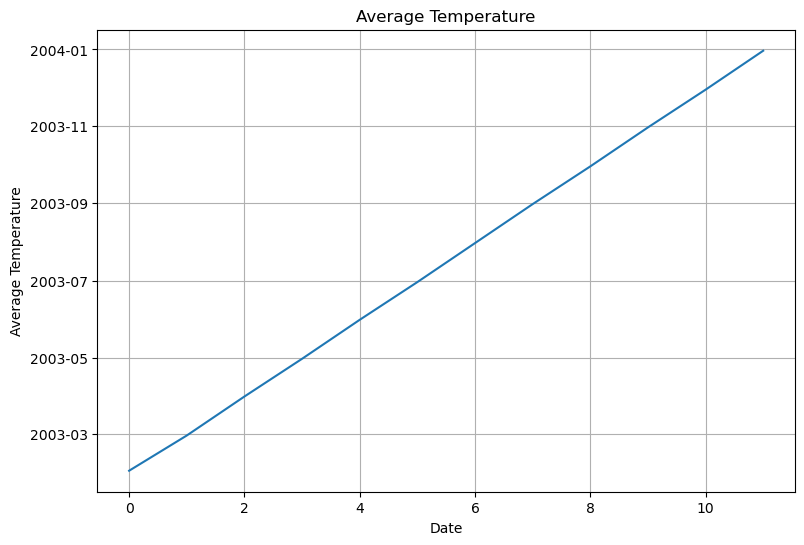

In [16]:
#ploting new_car_registration with respect to Date
plt.figure(figsize=(9,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.plot(dataset['x'])
plt.title('Average Temperature')
plt.show()

<AxesSubplot:xlabel='x', ylabel='Density'>

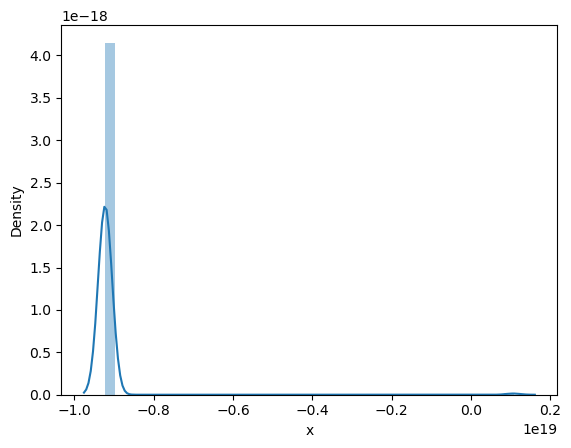

In [18]:
#displot 
sns.distplot(dataset['x'])

#### Monthly stripplot

Text(0, 0.5, 'Monthly Average Temperature data')

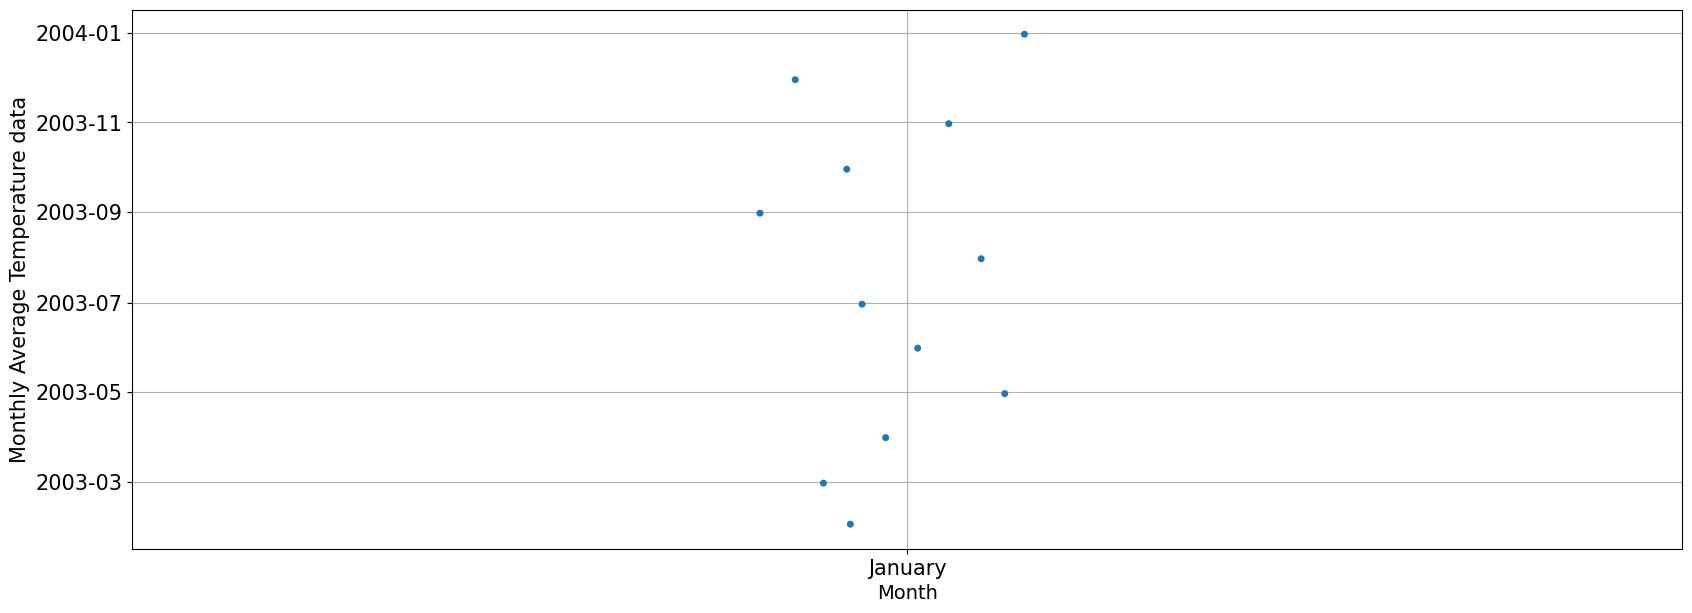

In [26]:
# Convert index to DatetimeIndex if it's not already
if not isinstance(dataset.index, pd.DatetimeIndex):
    dataset.index = pd.to_datetime(dataset.index)

# Extract month names from the DatetimeIndex
months = dataset.index.month_name()

# Plot the stripplot
_, ax = plt.subplots(figsize=(20, 7))
sns.stripplot(x=months, y=dataset.values[:, 0], ax=ax)
plt.grid()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly Average Temperature data', fontsize=15)


#### Yearly violinplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


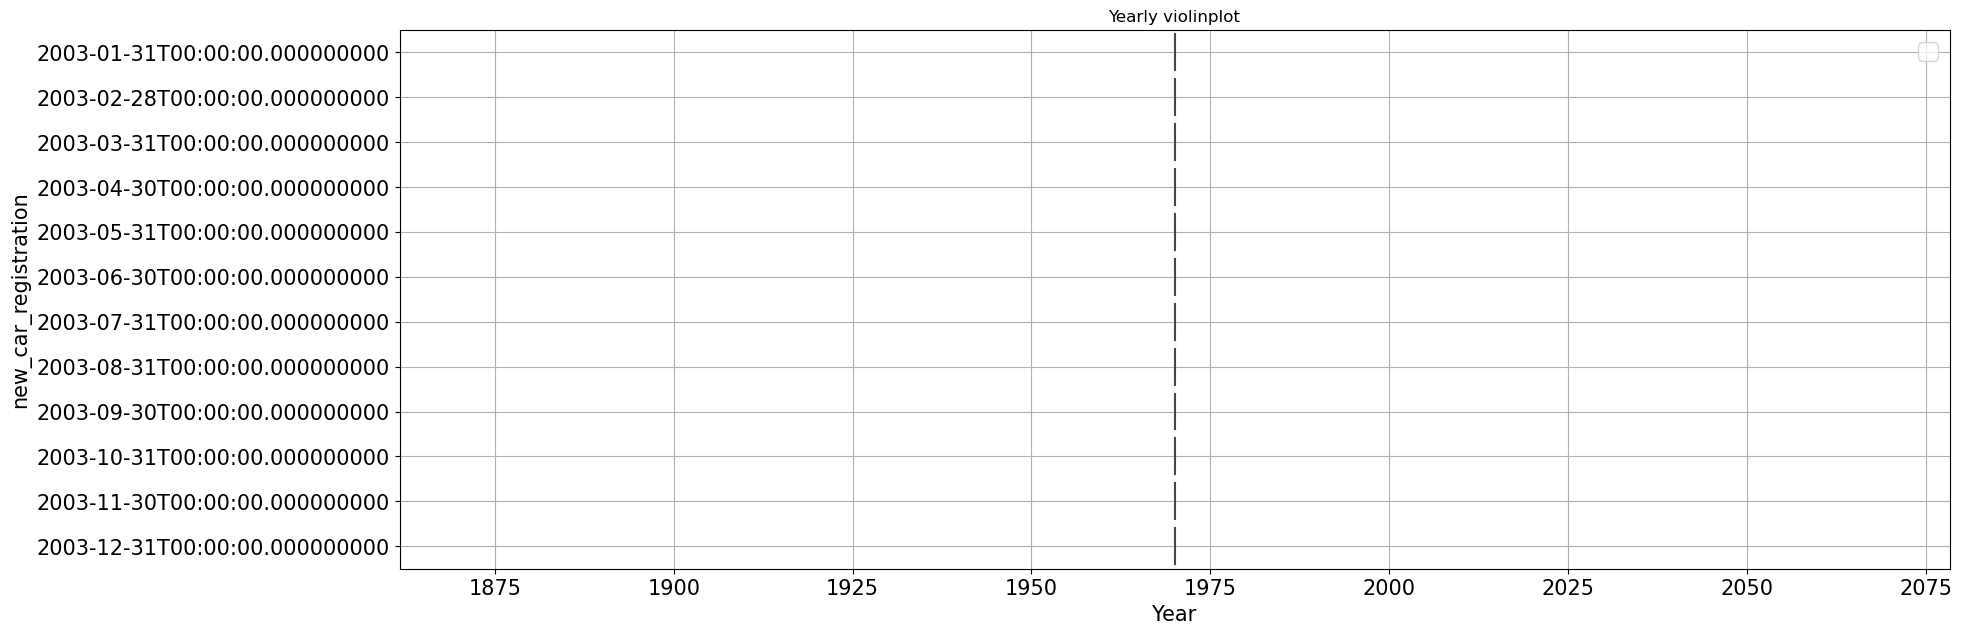

In [27]:
_, ax = plt.subplots(figsize=(20,7))
sns.violinplot(x = dataset.index.year,y = dataset.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Year',fontsize=15)
plt.ylabel('new_car_registration',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.title('Yearly violinplot')
plt.legend(fontsize="xx-large")

#### Plot the average registration per month and the month on month percentage change of registration.

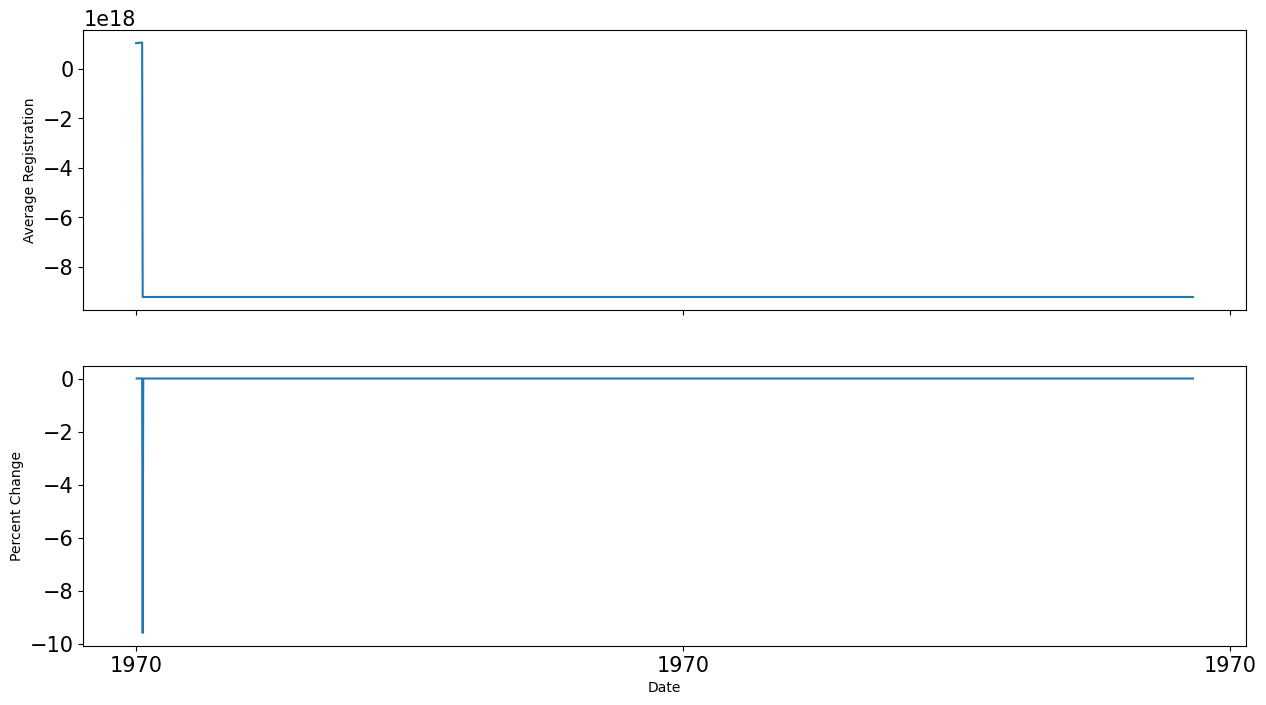

In [30]:
# Convert "x" column to numeric type
dataset["x"] = pd.to_numeric(dataset["x"], errors="coerce")

# Group by date and get average registration and percent change
average = dataset.groupby(dataset.index)["x"].mean()
pct_change = average.pct_change()

# Plot the results
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
axis1.plot(average.index, average.values)
axis1.set_ylabel('Average Registration')
axis2.plot(pct_change.index, pct_change.values)
axis2.set_ylabel('Percent Change')
plt.xlabel('Date')
plt.show()


#### Plotting the time series monthplot to understand the spread of registration across different years and within different months across years

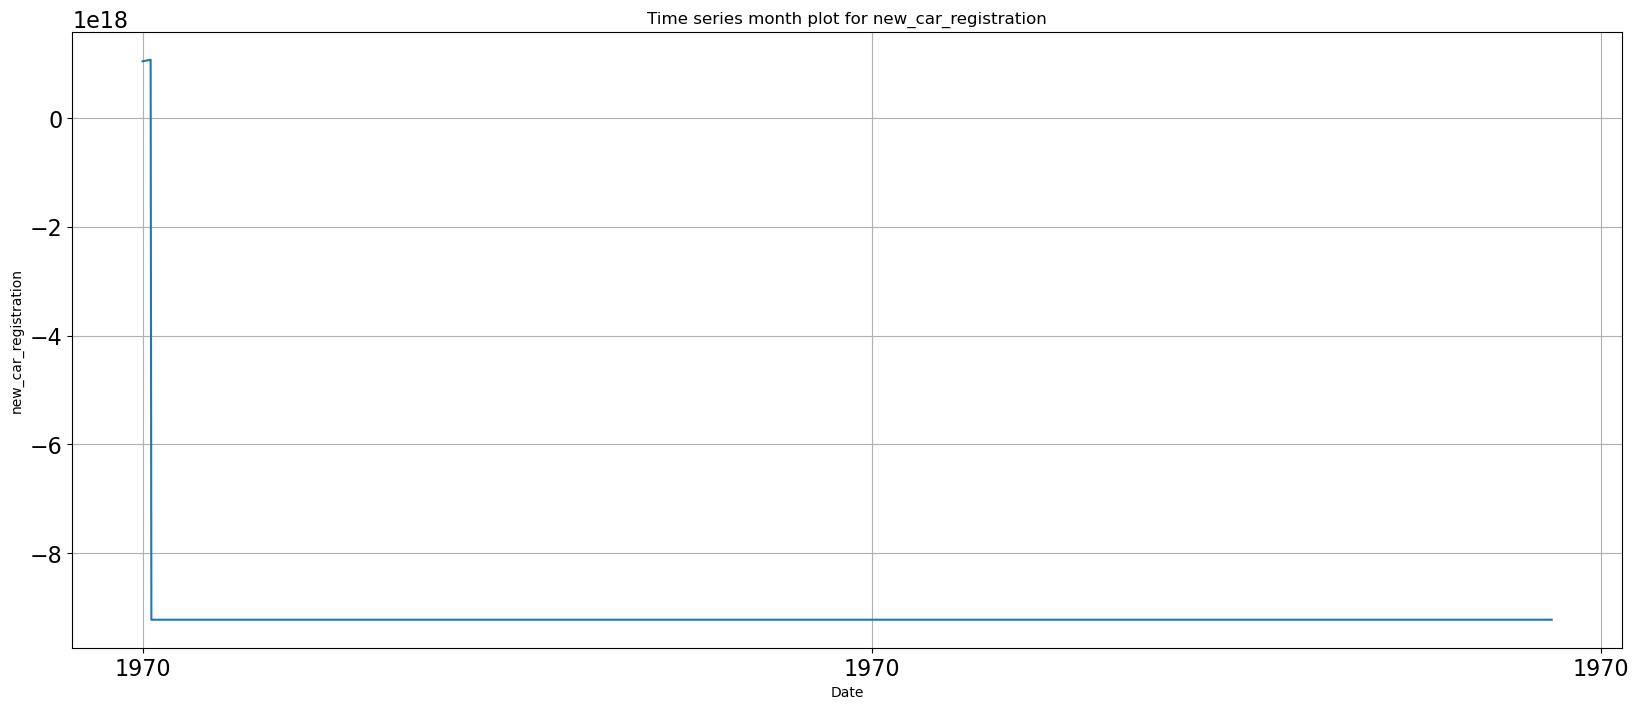

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Adjust figure size
plt.rcParams['figure.figsize'] = (20, 8)

# Adjust tick label sizes
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Resample the data to non-standard frequency
resampled_data = dataset['x'].resample('N').mean()

# Create month plot
plt.plot(resampled_data.index, resampled_data.values)
plt.xlabel('Date')
plt.ylabel('new_car_registration')
plt.title('Time series month plot for new_car_registration')
plt.grid()

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


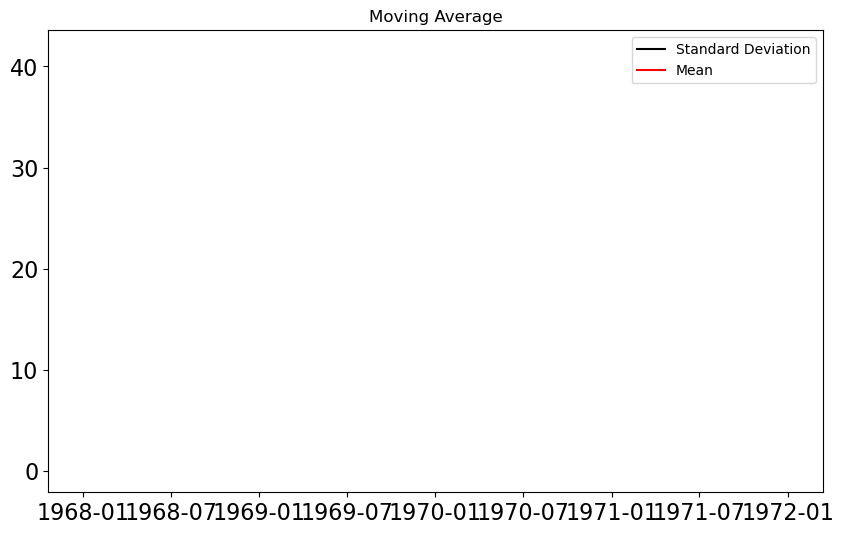

In [34]:
rcParams['figure.figsize'] = 10, 6
df_log = np.log(dataset)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

#### Plotting the Empirical Cumulative Distribution.

Text(0.5, 0, 'Temperature')

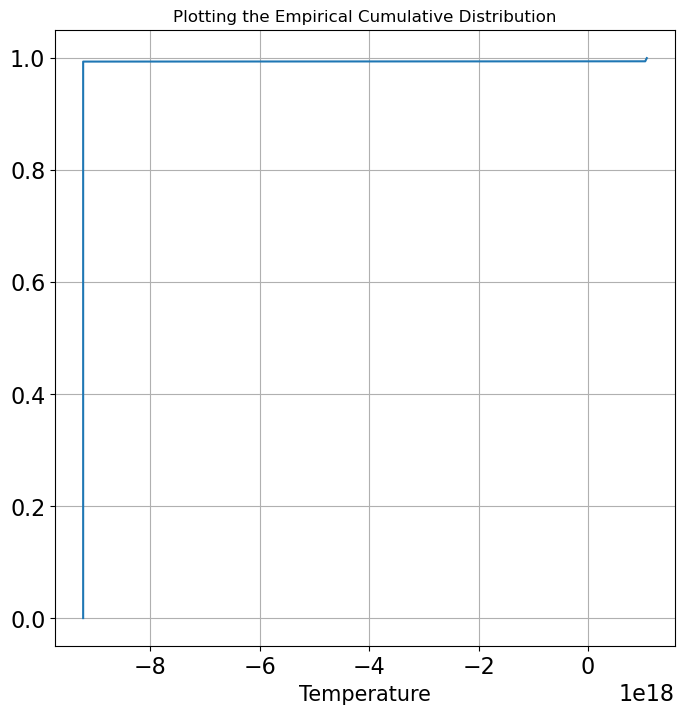

In [35]:
plt.figure(figsize = (8, 8))
cdf = ECDF(dataset['x'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.title('Plotting the Empirical Cumulative Distribution')
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.xlabel('Temperature', fontsize = 15)

#### Yearly Total Registration

In [ ]:
monthly_car_registration_across_years = pd.pivot_table(dataset_final, values = 'new_car_registration', columns = dataset_final.index.month_name(), index = dataset_final.index.year)
yearly_total_car_registration = monthly_car_registration_across_years.sum(axis = 1, skipna = True) 
yearly_total_car_registration


In [ ]:
yearly_total_car_registration.plot(figsize=(10,8))
plt.grid()
plt.title('Yearly Total Registration')
plt.xlabel('Years',fontsize=13)
plt.ylabel('Total car Registration',fontsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)


#### Plot registration for every year

In [ ]:
## Plot registration for every year
fig, (axis1) = plt.subplots(1,figsize=(13,4))
sns.scatterplot(x=dataset_final.index.year, y=dataset_final.values[:,0], data=dataset_final, ax=axis1)
plt.title('Plot car registration for every year')
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)
plt.xlabel('Year', fontsize = 13);
plt.ylabel('Avg Monthly Registration', fontsize = 13)

#### Decomposing the Time Series and plotting the different components for dataset

In [36]:
decomposition_dataset = seasonal_decompose(dataset,model='multiplcative')
decomposition_dataset.plot()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [37]:
decomposition_dataset = seasonal_decompose(dataset,model='additive')
decomposition_dataset.plot()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14

ValueError: freq N not understood. Please report if you think this is in error.

In [ ]:
print('Trend','\n',decomposition_dataset.trend.head(8),'\n')
print('Seasonality','\n',decomposition_dataset.seasonal.head(8),'\n')
print('Residual','\n',decomposition_dataset.resid.head(8),'\n')

#### Splitting the dataset into training and test into 70:30

In [38]:
train_dataset =  dataset[0:int(len(dataset)*0.7)] 
test_dataset = dataset[int(len(dataset)*0.7):]

In [39]:
print('train_dataset_shape',train_dataset.shape)
print(train_dataset.head)
print('test_dataset_shape',test_dataset.shape)
print(test_dataset.head)

train_dataset_shape (1353, 1)
<bound method NDFrame.head of                                                  x
1970-01-01 00:00:00.000000000  1043971200000000000
1970-01-01 00:00:00.000000001  1046390400000000000
1970-01-01 00:00:00.000000002  1049068800000000000
1970-01-01 00:00:00.000000003  1051660800000000000
1970-01-01 00:00:00.000000004  1054339200000000000
...                                            ...
1970-01-01 00:00:00.000001348 -9223372036854775808
1970-01-01 00:00:00.000001349 -9223372036854775808
1970-01-01 00:00:00.000001350 -9223372036854775808
1970-01-01 00:00:00.000001351 -9223372036854775808
1970-01-01 00:00:00.000001352 -9223372036854775808

[1353 rows x 1 columns]>
test_dataset_shape (580, 1)
<bound method NDFrame.head of                                                  x
1970-01-01 00:00:00.000001353 -9223372036854775808
1970-01-01 00:00:00.000001354 -9223372036854775808
1970-01-01 00:00:00.000001355 -9223372036854775808
1970-01-01 00:00:00.000001356 -922337203

#### Building various exponential smoothing models on the training dataset and evaluate the model using RMSE on the test dataset

#### Naive Approach

In [40]:
NaiveModel_train = train_dataset.copy()
NaiveModel_test = test_dataset.copy()

In [41]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train_dataset['x'])[len(np.asarray(train_dataset['x']))-1]
NaiveModel_train['naive'].head()

1970-01-01 00:00:00.000000000   -9223372036854775808
1970-01-01 00:00:00.000000001   -9223372036854775808
1970-01-01 00:00:00.000000002   -9223372036854775808
1970-01-01 00:00:00.000000003   -9223372036854775808
1970-01-01 00:00:00.000000004   -9223372036854775808
Name: naive, dtype: int64

In [42]:
NaiveModel_test['naive'] = np.asarray(train_dataset['x'])[len(np.asarray(train_dataset['x']))-1]
NaiveModel_test['naive'].head()

1970-01-01 00:00:00.000001353   -9223372036854775808
1970-01-01 00:00:00.000001354   -9223372036854775808
1970-01-01 00:00:00.000001355   -9223372036854775808
1970-01-01 00:00:00.000001356   -9223372036854775808
1970-01-01 00:00:00.000001357   -9223372036854775808
Name: naive, dtype: int64

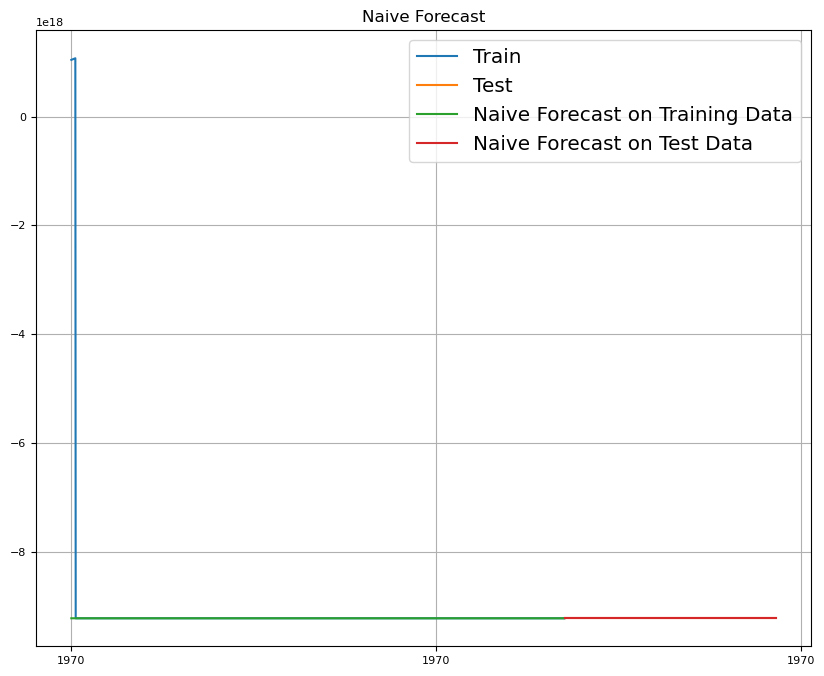

In [43]:
plt.figure(figsize=(10,8))
plt.plot(NaiveModel_train['x'], label='Train')
plt.plot(test_dataset['x'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(fontsize="x-large")
plt.grid()

In [44]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [46]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train_dataset['x'],NaiveModel_train['naive'],squared=False)
mape_model1_train = MAPE(train_dataset['x'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For Naive Model forecast on the Training Data,  RMSE is nan MAPE is 165.32


In [48]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test_dataset['x'],NaiveModel_test['naive'],squared=False)
mape_model1_test = MAPE(test_dataset['x'],NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For Naive Model forecast on the Test Data,  RMSE is 0.000 MAPE is nan


In [49]:
resultsDf_1_dataset = pd.DataFrame({'Model': 'NaiveModel', 
                                                      
                            'Test RMSE': [rmse_model1_test],
                            'Test MAPE': [mape_model1_test]},index=['Model 1'])

resultsDf_1_dataset

,Model,Test RMSE,Test MAPE
Model 1,NaiveModel,0.0,NaN


#### moving average

In [50]:
MovingAverage = dataset.copy()
MovingAverage.head()

,x
1970-01-01 00:00:00.000000000,1043971200000000000
1970-01-01 00:00:00.000000001,1046390400000000000
1970-01-01 00:00:00.000000002,1049068800000000000
1970-01-01 00:00:00.000000003,1051660800000000000
1970-01-01 00:00:00.000000004,1054339200000000000


In [52]:
MovingAverage['Trailing1_2'] = MovingAverage['x'].rolling(2).mean()
MovingAverage['Trailing1_4'] = MovingAverage['x'].rolling(4).mean()
MovingAverage['Trailing1_6'] = MovingAverage['x'].rolling(6).mean()
MovingAverage['Trailing1_8'] = MovingAverage['x'].rolling(8).mean()
MovingAverage.head()

,x,Trailing1_2,Trailing1_4,Trailing1_6,Trailing1_8
1970-01-01 00:00:00.000000000,1043971200000000000,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000001,1046390400000000000,1.045181e+18,NaN,NaN,NaN
1970-01-01 00:00:00.000000002,1049068800000000000,1.047730e+18,NaN,NaN,NaN
1970-01-01 00:00:00.000000003,1051660800000000000,1.050365e+18,1.047773e+18,NaN,NaN
1970-01-01 00:00:00.000000004,1054339200000000000,1.053000e+18,1.050365e+18,NaN,NaN


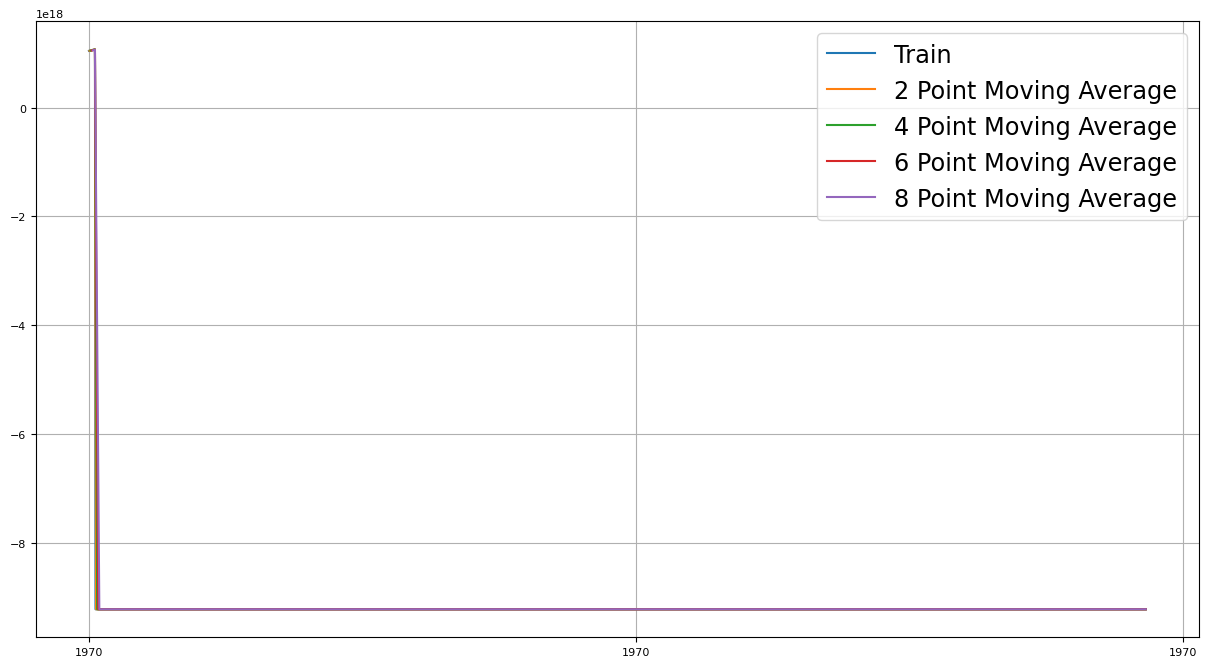

In [53]:
## Plotting on the whole data

plt.figure(figsize=(15,8))
plt.plot(MovingAverage['x'], label='Train')
plt.plot(MovingAverage['Trailing1_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing1_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing1_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing1_8'],label = '8 Point Moving Average')
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(loc = 'best')
plt.legend(fontsize="xx-large")
plt.grid()

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(dataset)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(dataset)*0.7):]

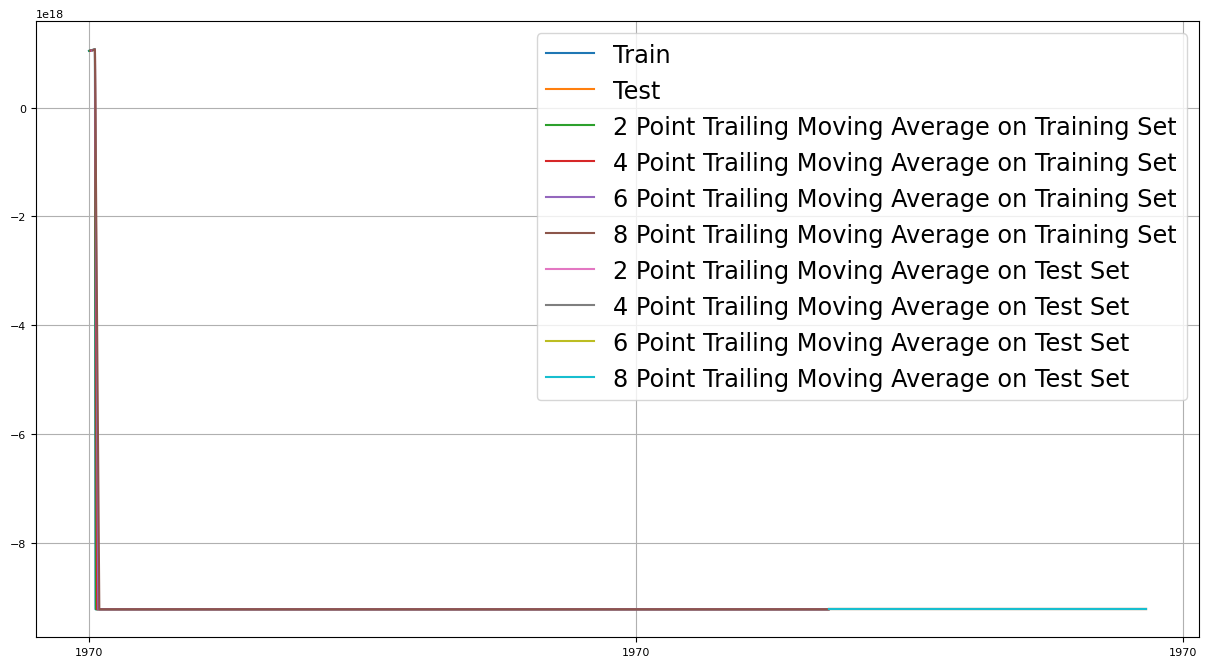

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,8))
plt.plot(trailing_MovingAverage_train['x'], label='Train')
plt.plot(trailing_MovingAverage_test['x'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing1_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing1_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing1_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing1_8'],label = '8 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing1_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing1_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing1_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing1_8'],label = '8 Point Trailing Moving Average on Test Set')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(loc = 'best')
plt.legend(fontsize="xx-large")
plt.grid()

In [57]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model2_test_2 = metrics.mean_squared_error(test_dataset['x'],trailing_MovingAverage_test['Trailing1_2'],squared=False)
mape_model2_test_2 = MAPE(test_dataset['x'],trailing_MovingAverage_test['Trailing1_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test_2, mape_model2_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model2_test_4 = metrics.mean_squared_error(test_dataset['x'],trailing_MovingAverage_test['Trailing1_4'],squared=False)
mape_model2_test_4 = MAPE(test_dataset['x'],trailing_MovingAverage_test['Trailing1_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test_4, mape_model2_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model2_test_6 = metrics.mean_squared_error(test_dataset['x'],trailing_MovingAverage_test['Trailing1_6'],squared=False)
mape_model2_test_6 = MAPE(test_dataset['x'],trailing_MovingAverage_test['Trailing1_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test_6, mape_model2_test_6))

## Test Data - RMSE and MAPE --> 8 point Trailing MA

rmse_model2_test_8 = metrics.mean_squared_error(test_dataset['x'],trailing_MovingAverage_test['Trailing1_8'],squared=False)
mape_model2_test_8 = MAPE(test_dataset['x'],trailing_MovingAverage_test['Trailing1_8'])
print("For 8 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test_8, mape_model2_test_8))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 0.000 MAPE is nan
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 0.000 MAPE is nan
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 0.000 MAPE is nan
For 8 point Moving Average Model forecast on the Training Data,  RMSE is 0.000 MAPE is nan


In [58]:
resultsDf_2_dataset = pd.DataFrame({'Model': ['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','8pointTrailingMovingAverage'],    
                            'Test RMSE': [rmse_model2_test_2,rmse_model2_test_4
                                          ,rmse_model2_test_6,rmse_model2_test_8]
                            ,'Test MAPE': [mape_model2_test_2,mape_model2_test_4,mape_model2_test_6
                                           ,mape_model2_test_8]}
                           ,index=['Model 2.1','Model 2.2'
                                   ,'Model 2.3','Model 2.4'])

resultsDf_dataset = pd.concat([resultsDf_1_dataset, resultsDf_2_dataset])
resultsDf_dataset

,Model,Test RMSE,Test MAPE
Model 1,NaiveModel,0.0,NaN
Model 2.1,2pointTrailingMovingAverage,0.0,NaN
Model 2.2,4pointTrailingMovingAverage,0.0,NaN
Model 2.3,6pointTrailingMovingAverage,0.0,NaN
Model 2.4,8pointTrailingMovingAverage,0.0,NaN


#### simple average

In [59]:
SimpleAverage_train = train_dataset.copy()
SimpleAverage_test = test_dataset.copy()

In [60]:
## Let us get the average of  the training set.

SimpleAverage_train['mean_forecast'] = train_dataset['x'].mean()
SimpleAverage_train.head()

,x,mean_forecast
1970-01-01 00:00:00.000000000,1043971200000000000,-9.132182e+18
1970-01-01 00:00:00.000000001,1046390400000000000,-9.132182e+18
1970-01-01 00:00:00.000000002,1049068800000000000,-9.132182e+18
1970-01-01 00:00:00.000000003,1051660800000000000,-9.132182e+18
1970-01-01 00:00:00.000000004,1054339200000000000,-9.132182e+18


In [61]:
SimpleAverage_test['mean_forecast'] = train_dataset['x'].mean()
SimpleAverage_test.head()

,x,mean_forecast
1970-01-01 00:00:00.000001353,-9223372036854775808,-9.132182e+18
1970-01-01 00:00:00.000001354,-9223372036854775808,-9.132182e+18
1970-01-01 00:00:00.000001355,-9223372036854775808,-9.132182e+18
1970-01-01 00:00:00.000001356,-9223372036854775808,-9.132182e+18
1970-01-01 00:00:00.000001357,-9223372036854775808,-9.132182e+18


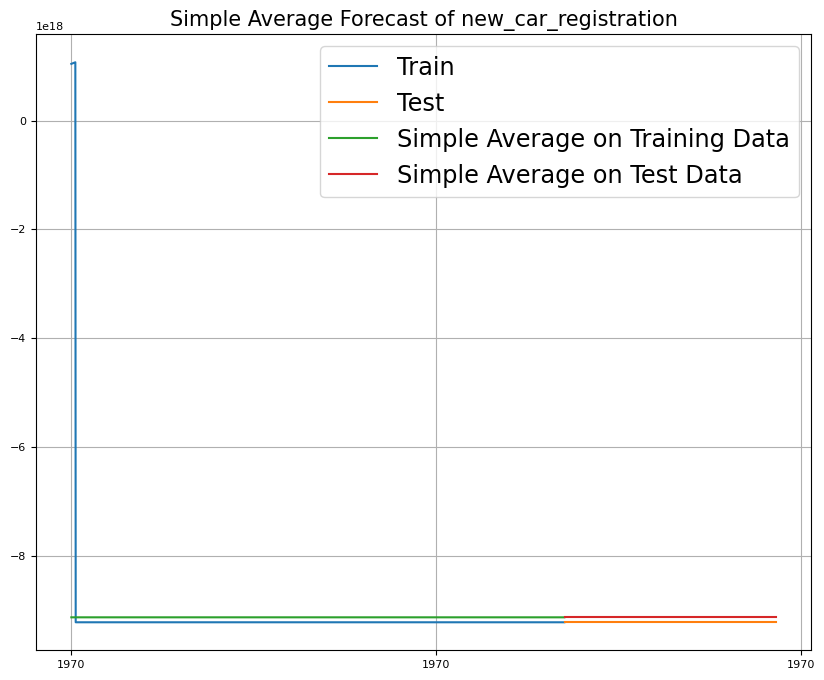

In [62]:
plt.figure(figsize=(10,8))
plt.plot(SimpleAverage_train['x'], label='Train')
plt.plot(SimpleAverage_test['x'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast of new_car_registration")
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(fontsize="xx-large")
plt.grid()

In [ ]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train_dataset['new_car_registration'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train_dataset['new_car_registration'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

In [ ]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test_dataset['new_car_registration'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test_dataset['new_car_registration'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

In [ ]:
resultsDf_3_dataset = pd.DataFrame({'Model': 'SimpleAverage', 
                            
                            'Test RMSE': [rmse_model3_test],
                            'Test MAPE': [mape_model3_test]}
                           ,index=['Model 3'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_3_dataset])
resultsDf_dataset

# Simple Exponential Smoothing

In [ ]:
SES_train_dataset = train_dataset.copy()
SES_test_dataset = test_dataset.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train_dataset['new_car_registration'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [ ]:
model_SES_autofit.params

In [ ]:
SES_train_dataset['predict'] = model_SES_autofit.fittedvalues
SES_train_dataset.head()

In [ ]:
len(SES_test_dataset)

In [ ]:
SES_test_dataset['predict'] = model_SES_autofit.forecast(len(SES_test_dataset))
SES_test_dataset.head()

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_dataset['new_car_registration'], label='Train')
plt.plot(SES_test_dataset['new_car_registration'], label='Test')

plt.plot(SES_train_dataset['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_dataset['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.295531 Predictions');

In [ ]:
## Training Data RMSE and MAPE

rmse_model4_train_1 = metrics.mean_squared_error(SES_train_dataset['new_car_registration'],SES_train_dataset['predict'],squared=False)
mape_model4_train_1 = MAPE(SES_train_dataset['new_car_registration'],SES_train_dataset['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_train_1, mape_model4_train_1))

In [ ]:
## Test Data RMSE and MAPE

rmse_model4_test_1 = metrics.mean_squared_error(SES_test_dataset['new_car_registration'],SES_test_dataset['predict'],squared=False)
mape_model4_test_1 = MAPE(SES_test_dataset['new_car_registration'],SES_test_dataset['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_1, mape_model4_test_1))


In [ ]:
resultsDf_4_1_dataset = pd.DataFrame({'Model': 'Alpha=0.295531,SimpleExponentialSmoothing','Test RMSE': [rmse_model4_test_1],'Test MAPE': [mape_model4_test_1]}
                           ,index=['Model 4.1'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_4_1_dataset])
resultsDf_dataset

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_4_2_dataset = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_4_2_dataset

In [ ]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_dataset['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_dataset['predict',i] = model_SES_alpha_i.forecast(len(SES_test_dataset))
    
    rmse_model4_train_i = metrics.mean_squared_error(SES_train_dataset['new_car_registration'],SES_train_dataset['predict',i],squared=False)
    mape_model4_train_i = MAPE(SES_train_dataset['new_car_registration'],SES_train_dataset['predict',i])
    
    rmse_model4_test_i = metrics.mean_squared_error(SES_test_dataset['new_car_registration'],SES_test_dataset['predict',i],squared=False)
    mape_model4_test_i = MAPE(SES_test_dataset['new_car_registration'],SES_test_dataset['predict',i])
    
    resultsDf_4_2_dataset = resultsDf_4_2_dataset.append({'Alpha Values':i,'Train RMSE':rmse_model4_train_i 
                                      ,'Train MAPE': mape_model4_train_i,'Test RMSE':rmse_model4_test_i
                                      ,'Test MAPE':mape_model4_test_i}, ignore_index=True)

In [ ]:
resultsDf_4_2_dataset.sort_values(by = 'Test RMSE')

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(SES_train_dataset['new_car_registration'], label='Train')
plt.plot(SES_test_dataset['new_car_registration'], label='Test')

plt.plot(SES_train_dataset['predict'], label='Alpha=0.98,SimpleExponentialSmoothing predictions on Training Set')
plt.plot(SES_test_dataset['predict'], label='Alpha=0.98,SimpleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.98 Predictions, Simple Exponential Smoothing')


plt.grid()

In [ ]:
resultsDf_4_3_dataset = pd.DataFrame({'Model': ['Alpha=0.98,SimpleExponentialSmoothing'],
                                'Test RMSE': [resultsDf_4_2_dataset['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_4_2_dataset['Test MAPE'][1]]}
                           ,index=['Model 4.2'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_4_3_dataset])
resultsDf_dataset

#### Double Exponential Smoothing (Holt's Model)

In [ ]:
DES_train = train_dataset.copy()
DES_test = test_dataset.copy()

In [ ]:
model_DES = Holt(DES_train['new_car_registration'])

In [ ]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [ ]:
model_DES_autofit.params_formatted

In [ ]:
test_predictions_model5 = model_DES_autofit.forecast(steps=len(test_dataset))
test_predictions_model5.head()

In [ ]:
## Test Data - RMSE and MAPE

rmse_model5_test = metrics.mean_squared_error(DES_test['new_car_registration'],test_predictions_model5,squared=False)
mape_model5_test = MAPE(DES_test['new_car_registration'],test_predictions_model5)
print("For Alpha=0.0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test, mape_model5_test))

In [ ]:
resultsDf5_1_dataset = pd.DataFrame({'Model': "Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",'Test RMSE': [rmse_model5_test],'Test MAPE': [mape_model5_test]}
                              ,index=['Model 5.1'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf5_1_dataset])
resultsDf_dataset

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5_2_dataset = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2_dataset

In [ ]:
rmse_model5_train = metrics.mean_squared_error(DES_train['new_car_registration'],DES_train['predict',i,j],squared=False)
mape_model5_train = MAPE(DES_train['new_car_registration'],DES_train['predict',i,j])
        

In [ ]:
DES_test['predict',i,j].fillna(999, inplace=True)

In [ ]:
DES_test['predict',i,j].isnull().sum()

In [ ]:
rmse_model5_test = metrics.mean_squared_error(DES_test['new_car_registration'],DES_test['predict',i,j],squared=False)
mape_model5_test = MAPE(DES_test['new_car_registration'],DES_test['predict',i,j])
        

In [ ]:
resultsDf_5_2_dataset = resultsDf_5_2_dataset.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model5_train
                                      ,'Train MAPE': mape_model5_train,'Test RMSE':rmse_model5_test
                                      ,'Test MAPE':mape_model5_test}, ignore_index=True)

In [ ]:
resultsDf_5_2_dataset

In [ ]:
resultsDf_5_2_dataset.sort_values(by=['Test RMSE']).head()

In [ ]:
## Plotting on both the Training and Test data 
## Alpha=0.18,Beta=0.68,DoubleExponentialSmoothing

DES_train = train_dataset.copy()
DES_test = test_dataset.copy()

model_DES = Holt(DES_train['new_car_registration'])

model_DES_fit = model_DES.fit(smoothing_level=0.18,smoothing_slope=0.68,optimized=False,use_brute=True)

DES_train['predict'] = model_DES_fit.fittedvalues
DES_test['predict'] = model_DES_fit.forecast(steps=55)


plt.figure(figsize=(17,9))
plt.plot(DES_train['new_car_registration'], label='Train')
plt.plot(DES_test['new_car_registration'], label='Test')

plt.plot(DES_train['predict'], label='Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(loc = 'best')
plt.legend(fontsize="xx-large")
plt.grid()
plt.title('Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing for new_car_registration')


plt.grid()

In [ ]:
resultsDf_5_3_dataset = pd.DataFrame({'Model': 'Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing','Test RMSE': [resultsDf_5_2_dataset['Test RMSE'][0]],'Test MAPE':[resultsDf_5_2_dataset['Test MAPE'][0]]}
                       ,index=['Model 5.2'])




resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_5_3_dataset])
resultsDf_dataset

#### Triple Exponential Smoothing (Holt - Winter's Model)

In [ ]:
TES_train = train_dataset.copy()
TES_test = test_dataset.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['new_car_registration'],trend='additive',seasonal='multiplicative',freq='M')

In [ ]:
model_TES_autofit = model_TES.fit()

In [ ]:
model_TES_autofit.params

In [ ]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

In [ ]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=11)
TES_test.head()

In [ ]:
## Plotting on both the Training and Test using autofit
## Alpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing

plt.figure(figsize=(17,9))
plt.plot(TES_train['new_car_registration'], label='Train_dataset')
plt.plot(TES_test['new_car_registration'], label='Test_dataset')


plt.plot(TES_train['auto_predict'], label='Alpha=0.056,Beta=0.056,Gamma=0.589, TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.056,Beta=0.056,Gamma=0.589, TripleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(loc = 'best')
plt.legend(fontsize="xx-large")
plt.grid()
plt.title('Alpha=0.056,Beta=0.056,Gamma=0.589,TripleExponentialSmoothing for new_car_registration')
plt.grid()

In [ ]:
TES_test['auto_predict'].fillna(999, inplace=True)

In [ ]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['new_car_registration'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['new_car_registration'],TES_train['auto_predict'])
print("For lpha=0.056,Beta=0.056,Gamma=0.589, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))


In [ ]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['new_car_registration'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['new_car_registration'],TES_test['auto_predict'])
print("For lpha=0.056,Beta=0.056,Gamma=0.589, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

In [ ]:
resultsDf_6_1_dataset = pd.DataFrame({'Model': ' Alpha=0.056,Beta=0.056,Gamma=0.589,TripleExponentialSmoothing','Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Model 6.1'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_6_1_dataset])
resultsDf_dataset

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2_dataset = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_2_dataset

In [ ]:
TES_test['predict',i,j,k].isnull().sum()

In [ ]:
rmse_model6_test = metrics.mean_squared_error(TES_test['new_car_registration'],TES_test['predict',i,j,k],squared=False)
mape_model6_test = MAPE(TES_test['new_car_registration'],TES_test['predict',i,j,k])
        

In [ ]:
TES_test['predict',i,j,k].fillna(999, inplace=True)

In [ ]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=11)
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['new_car_registration'],TES_train['predict',i,j,k],squared=False)
            mape_model6_train = MAPE(TES_train['new_car_registration'],TES_train['predict',i,j,k])
        
            #rmse_model6_test = metrics.mean_squared_error(TES_test['new_car_registration'],TES_test['predict',i,j,k],squared=False)
            #mape_model6_test = MAPE(TES_test['new_car_registration'],TES_test['predict',i,j,k])
            resultsDf_6_2_dataset = resultsDf_6_2_dataset.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)
            

In [ ]:
resultsDf_6_2_dataset

In [ ]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
#Alpha=0.11,Beta=0.55,Gamma=0.55,TripleExponentialSmoothing

plt.figure(figsize=(17,9))
plt.plot(TES_train['new_car_registration'], label='Train')
plt.plot(TES_test['new_car_registration'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.5, 0.5], label='Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.5, 0.5], label='Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(loc = 'best')
plt.legend(fontsize="xx-large")
plt.grid()
plt.title('Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing')
plt.grid()

In [ ]:
resultsDf_6_3_dataset = pd.DataFrame({'Model': 'Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing','Test RMSE': [resultsDf_6_2_dataset['Test RMSE'][180]],'Test MAPE':[resultsDf_6_2_dataset['Test MAPE'][180]]}
                           ,index=['Model 6.2'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_6_3_dataset])
resultsDf_dataset

#### Checking for the stationarity of the data at alpha = 0.05.

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [ ]:
test_stationarity(train_dataset['new_car_registration'])

In [ ]:
plot_pacf(dataset_final['new_car_registration'].diff().dropna(),lags=15)
plt.show()

In [ ]:
plot_acf(dataset_final['new_car_registration'].diff().dropna(),lags=15)
plt.show()

In [ ]:
test_stationarity(train_dataset['new_car_registration'].diff().dropna())

#### Building an automated version of the ARIMA

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p =  range(0, 3)
q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

In [ ]:
ARIMA_train = train_dataset.copy()
ARIMA_test = test_dataset.copy()

In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC1 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC1

In [ ]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

for param in pdq:
    ARIMA_model = pm.auto_arima(ARIMA_train, seasonal=True, m=12, suppress_warnings=True)

    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC1 = ARIMA_AIC1.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

In [ ]:
#defining the pipeline
mod = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

In [ ]:

#fitting the pipeline
result_Arima = mod.fit(ARIMA_train)
print(result_Arima.summary())


In [ ]:
predicted_autoARIMA = mod.predict(test_dataset.shape[0])
predicted_autoARIMA[1]

In [ ]:
#Test data RMSE and MAPE
from math import sqrt
from sklearn.metrics import  mean_squared_error


In [ ]:
resultsDf_7_dataset = pd.DataFrame({'Model':'autoARIMA(0,1,1)'}
                           ,index=['Model 7'])

resultsDf_dataset = pd.concat([resultsDf_dataset, resultsDf_7_dataset])
resultsDf_dataset

In [ ]:
plt.plot(train_dataset,label='Training Data')
plt.plot(test_dataset,label='Test Data')
#plt.plot(test_dataset.index,predicted_autoARIMA[1],label='Predicted Data - ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Auto Arima(0,1,1)')
plt.grid()

#### Building ARIMA models based on the cut-off points of ACF and PACF on the training data

In [ ]:
test_stationarity(train_dataset['new_car_registration'])

In [ ]:
test_stationarity(train['new_car_registration'].diff().dropna())

In [ ]:
#ACF Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train['new_car_registration'],lags=20)
plot_acf(train['new_car_registration'].diff().dropna(),lags=20,title='Differenced Series Autocorrelation for new_car_registration')
plt.show()

In [ ]:
#PACF Plot
plot_pacf(train_dataset['new_car_registration'],lags=15)
plot_pacf(train_dataset['new_car_registration'].diff().dropna(),lags=15,title='Differenced Series Partial Autocorrelation for new_car_registration')
plt.show()

In [ ]:
plt.plot(train_dataset,label='Training Data')
plt.plot(test_dataset,label='Test Data')
#plt.plot(test_dataset.index,predicted_autoARIMA[0],label='Predicted Data - autoARIMA')
#plt.plot(test_dataset.index,predicted_acf_pacf_ARIMA[0],label='Predicted Data - acf_pacf_ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Arima ACF_PACF(2,1,2)')
plt.grid()

#### Based on the model-building exercise, building the most optimum model on the complete data and predict 6 months into the future with 95% confidence interval of value

In [ ]:
pd.options.display.max_colwidth = 100
resultsDf_dataset.sort_values(by = 'Test RMSE')

In [ ]:
model_DES_full = Holt(dataset_final['new_car_registration'])

In [ ]:
fullmodel1 = model_DES_full.fit(smoothing_level=0.16,smoothing_slope=0.68,optimized=False,use_brute=True)

In [ ]:
RMSE_fullmodel1 = metrics.mean_squared_error(dataset_final['new_car_registration'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(dataset_final['new_car_registration'],fullmodel1.fittedvalues)

print('Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

In [ ]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=6)

In [ ]:
dataset_final.plot()
prediction_1.plot()

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_dataset = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_dataset.head()

In [ ]:
# plot the forecast along with the confidence band

axis = dataset_final.plot(label='Actual', figsize=(10,8))
pred_1_dataset['prediction'].plot(ax=axis, label='Forecast-TES', alpha=0.5)
axis.fill_between(pred_1_dataset.index, pred_1_dataset['lower_CI'], pred_1_dataset['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('new_car_registration')
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Triple Exponential Smoothing 0.3,0.15,0.2')

# Part B:Logistic Regression

In [78]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [63]:
#read the dataset
df = pd.read_csv("Diabetes Dataset.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
4,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N


In [64]:
#checking the null values of dataset
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [65]:
#describe the dataset
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [66]:
#checking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


#### Exploratory data analysis

<AxesSubplot:xlabel='AGE', ylabel='CLASS'>

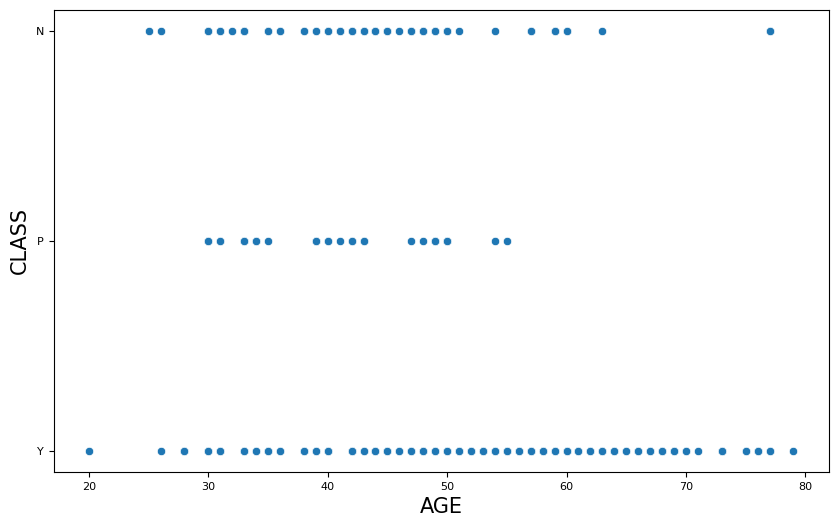

In [67]:
#plot for age and ed
sns.scatterplot(x='AGE',y='CLASS',data=df)

<AxesSubplot:xlabel='Gender', ylabel='AGE'>

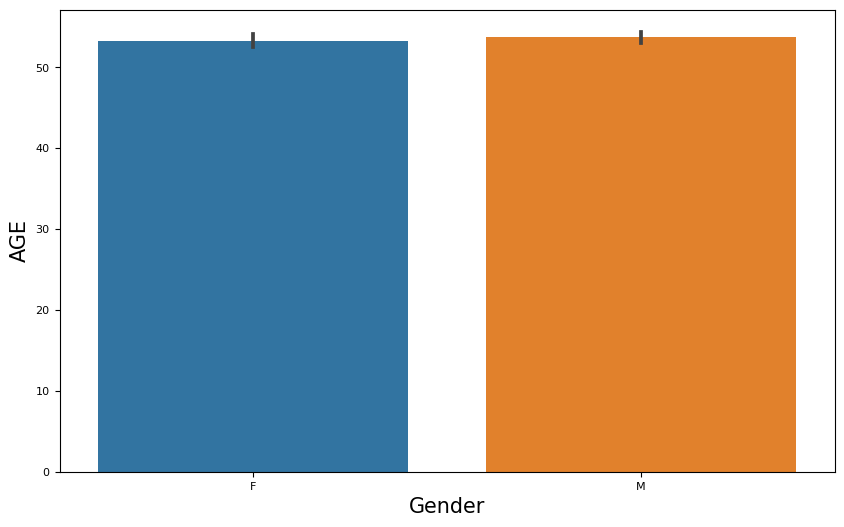

In [68]:
#plot for gender vs ed
sns.barplot(x='Gender',y='AGE',data=df)

<AxesSubplot:xlabel='Gender', ylabel='AGE'>

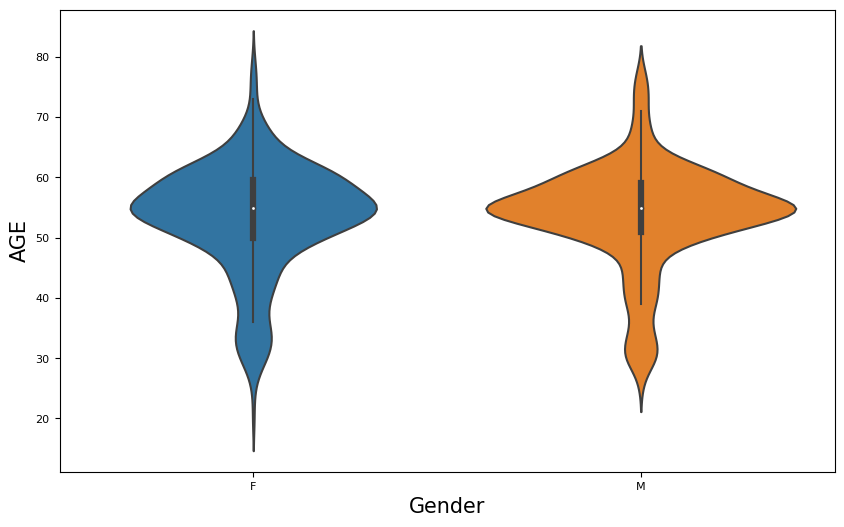

In [69]:
#plot for gender vs income
sns.violinplot(x='Gender',y='AGE',data=df)

In [70]:
#splitting the dataset
x=df.drop(['CLASS'],axis=1)

In [71]:
y=df['CLASS']

In [72]:
#perform train and test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3)

In [74]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
encoded_train = pd.get_dummies(x_train, columns=['Gender'])
encoded_test = pd.get_dummies(x_test, columns=['Gender'])

classifier = LogisticRegression()
classifier.fit(encoded_train, y_train)

LogisticRegression()

In [75]:
import pandas as pd

# Make sure the columns in the test data match the columns in the encoded training data
missing_cols = set(encoded_train.columns) - set(encoded_test.columns)
for col in missing_cols:
    encoded_test[col] = 0

# predict value on test data
preds = classifier.predict(encoded_test)
preds


array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [79]:
#accuracy
accuracy_score(y_test,preds)

0.87

In [80]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)

[[  0   0  30]
 [  0   0   9]
 [  0   0 261]]


In [81]:
#checking for classification report of model
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        30
           P       0.00      0.00      0.00         9
           Y       0.87      1.00      0.93       261

    accuracy                           0.87       300
   macro avg       0.29      0.33      0.31       300
weighted avg       0.76      0.87      0.81       300

